<a href="https://colab.research.google.com/github/Abhinavpanjiyar1/Pytorch/blob/main/Moore's_law.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/bf9388ae8c0ebc4a5d8ce0c630dbbad9af638052/tf2.0/moore.csv

--2024-07-31 05:38:51--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/bf9388ae8c0ebc4a5d8ce0c630dbbad9af638052/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-07-31 05:38:51 (37.4 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
#load the data
data = pd.read_csv('moore.csv', header = None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1].reshape(-1,1)

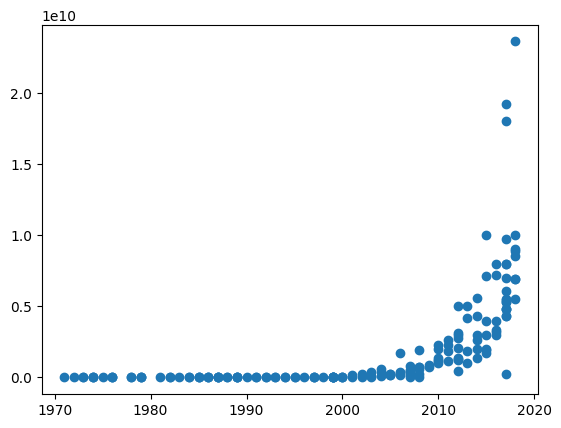

In [4]:
plt.scatter(X ,Y)

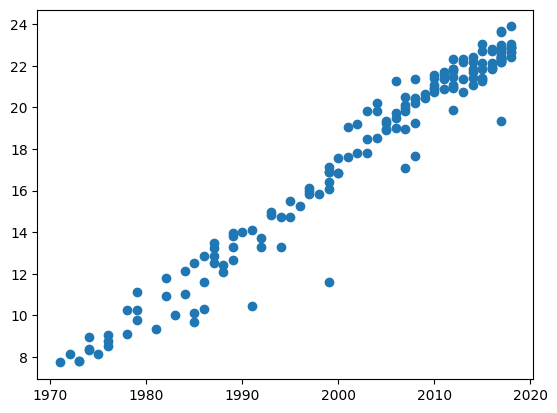

In [5]:
Y = np.log(Y)
plt.scatter(X, Y);

In [6]:
# scale and center both X and Y
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx)/sx
Y = (Y-my)/sy

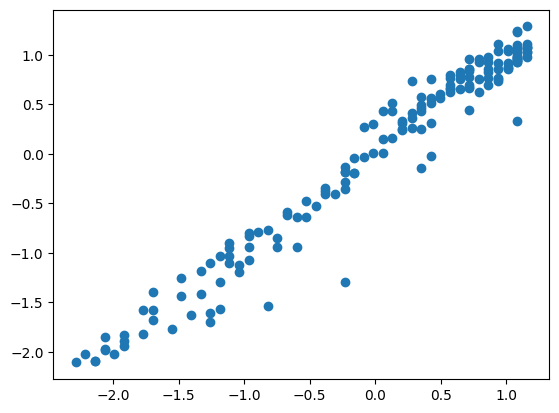

In [7]:
plt.scatter(X, Y)

In [8]:
#cast the floater
X= X.astype(np.float32)
Y = Y.astype(np.float32)

In [9]:
#create the linear regression model
model = nn.Linear(1,1)


In [10]:
#loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum =0.7)


In [11]:
inputs  =torch.from_numpy(X)
targets = torch.from_numpy(Y)


In [12]:
type(inputs)

torch.Tensor

#train the model

In [13]:
n_epochs = 100
losses = []

for it in range(n_epochs):
  #zero the parameter gradient
  optimizer.zero_grad()

  # forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # record the loss
  losses.append(loss.item())

  #backward and optimize
  loss.backward()
  optimizer.step()

  print(f'Epoch: {it+1}/{n_epochs} , Loss: {loss.item(): .4f}')


Epoch: 1/100 , Loss:  0.3510
Epoch: 2/100 , Loss:  0.2385
Epoch: 3/100 , Loss:  0.1166
Epoch: 4/100 , Loss:  0.0498
Epoch: 5/100 , Loss:  0.0398
Epoch: 6/100 , Loss:  0.0551
Epoch: 7/100 , Loss:  0.0667
Epoch: 8/100 , Loss:  0.0646
Epoch: 9/100 , Loss:  0.0541
Epoch: 10/100 , Loss:  0.0440
Epoch: 11/100 , Loss:  0.0391
Epoch: 12/100 , Loss:  0.0387
Epoch: 13/100 , Loss:  0.0402
Epoch: 14/100 , Loss:  0.0410
Epoch: 15/100 , Loss:  0.0406
Epoch: 16/100 , Loss:  0.0397
Epoch: 17/100 , Loss:  0.0389
Epoch: 18/100 , Loss:  0.0385
Epoch: 19/100 , Loss:  0.0385
Epoch: 20/100 , Loss:  0.0386
Epoch: 21/100 , Loss:  0.0387
Epoch: 22/100 , Loss:  0.0387
Epoch: 23/100 , Loss:  0.0386
Epoch: 24/100 , Loss:  0.0385
Epoch: 25/100 , Loss:  0.0385
Epoch: 26/100 , Loss:  0.0385
Epoch: 27/100 , Loss:  0.0385
Epoch: 28/100 , Loss:  0.0385
Epoch: 29/100 , Loss:  0.0385
Epoch: 30/100 , Loss:  0.0385
Epoch: 31/100 , Loss:  0.0385
Epoch: 32/100 , Loss:  0.0385
Epoch: 33/100 , Loss:  0.0385
Epoch: 34/100 , Los

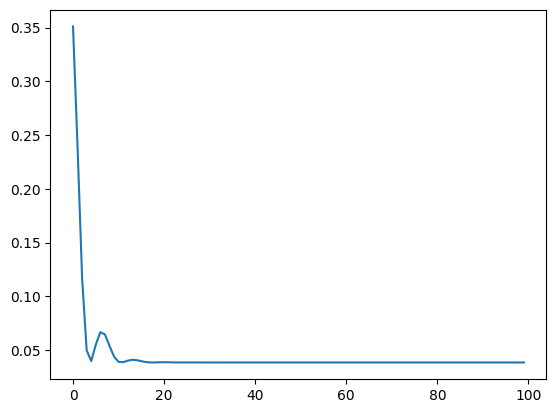

In [14]:
plt.plot(losses);

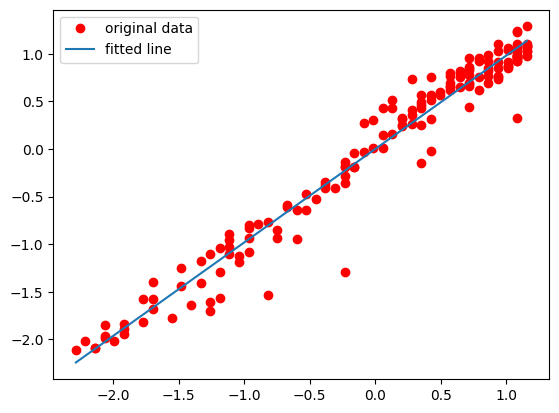

In [15]:
# plot the graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label = 'original data')
plt.plot(X, predicted, label = 'fitted line')
plt.legend()
plt.show()

In [16]:
#what does this mean
w =model.weight.data.numpy()
print(w)

[[0.9805711]]


In [17]:
a = w[0,0]* sy/sx
print(a)


0.341682476269441


In [18]:
print('time to double:', np.log(2)/a)

time to double: 2.0286295865327006
